In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons


In [3]:
x,y = make_moons(n_samples=500,noise=0.2)


In [4]:
df = {"x1":x[:,0],"x2":x[:,1],"y":y}

In [5]:
dataset = pd.DataFrame(df)

In [6]:
dataset

,x1,x2,y
0,-0.409729,0.870124,0
1,-1.193937,0.035100,0
2,0.677601,-0.268405,1
3,2.376816,0.445160,1
4,1.774878,-0.195526,1
...,...,...,...
495,2.081993,0.245089,1
496,-0.400455,0.636826,0
497,0.001887,0.872981,0
498,0.577253,1.225832,0


<Axes: xlabel='x1', ylabel='x2'>

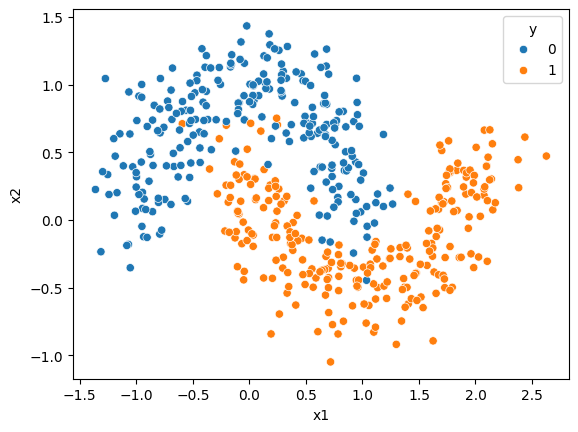

In [7]:
import seaborn as sns
sns.scatterplot(x="x1",y="x2",data=dataset,hue="y")

In [8]:
x_a = dataset.iloc[:,:-1]
y_a = dataset["y"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [12]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)*100,dt.score(X_test,y_test)

(100.0, 0.94)

In [13]:
sv = SVC()
sv.fit(X_train,y_train)
sv.score(X_train,y_train)*100,sv.score(X_test,y_test)

(96.0, 1.0)

In [14]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_train,y_train)*100,gnb.score(X_test,y_test)

(85.75, 0.87)

In [15]:
from sklearn.ensemble import VotingClassifier

In [17]:
li = [("dt1",DecisionTreeClassifier()),("sv1",SVC()),("gnb",GaussianNB())]

In [20]:
vc = VotingClassifier(li,weights=[10,4,7])
vc.fit(X_train,y_train)

,estimators,"[('dt1', ...), ('sv1', ...), ...]"
,voting,'hard'
,weights,"[10, 4, ...]"
,n_jobs,None
,flatten_transform,True
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [23]:
vc.score(X_train,y_train)*100,vc.score(X_test,y_test)*100

(96.75, 98.0)

In [26]:
prd = {"dt1":dt.predict(X_test),"svm":sv.predict(X_test),"gnb":gnb.predict(X_test),"vc":vc.predict(X_test)}

In [27]:
pd.DataFrame(prd)

,dt1,svm,gnb,vc
0,1,1,1,1
1,1,1,1,1
2,0,0,0,0
3,0,0,0,0
4,1,1,1,1
...,...,...,...,...
95,0,0,0,0
96,0,0,0,0
97,1,1,1,1
98,1,1,0,1
